<a href="https://colab.research.google.com/github/MarianaSosaTerrazas/DIPLOMADO_CIENCIA_MATEMATICA_2024-1/blob/main/Clase06Mayo_MST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import nltk

In [101]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [102]:
from nltk.corpus import movie_reviews
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import re, string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [103]:
documents=[(list (movie_reviews.words(fileid)),category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [104]:
len(documents)

2000

In [105]:
all_words=nltk.FreqDist(w.lower()for w in movie_reviews.words())
word_features=list(all_words)[:2000]

In [106]:
def document_features(document):
  document_words=set(document)
  features={}
  for word in word_features:
    features['contains({})'.format(word)]=(word in document_words)
  return features

In [107]:
featuresets=[(document_features(d),c)for (d,c)in documents]
train_set, test_set=featuresets[:1600], featuresets[1600:]
classifier=nltk.NaiveBayesClassifier.train(train_set)

In [108]:
print(nltk.classify.accuracy(classifier,test_set))

0.835


In [109]:
classifier.show_most_informative_features(10)

Most Informative Features
   contains(outstanding) = True              pos : neg    =      9.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      7.2 : 1.0
         contains(damon) = True              pos : neg    =      6.2 : 1.0
         contains(mulan) = True              pos : neg    =      5.8 : 1.0
        contains(seagal) = True              neg : pos    =      5.7 : 1.0
          contains(lame) = True              neg : pos    =      5.4 : 1.0
     contains(portrayal) = True              pos : neg    =      5.3 : 1.0
         contains(awful) = True              neg : pos    =      4.9 : 1.0
        contains(stupid) = True              neg : pos    =      4.8 : 1.0
    contains(ridiculous) = True              neg : pos    =      4.7 : 1.0


In [110]:
analyzer=SentimentIntensityAnalyzer()

In [111]:
texts=['I love this product! It works great and is very affordable.',
      'This product is okay. It gets the job done, but could be better.',
      "I hate this product. It doesn't work at all ans is a waste of money",
       'Its relly bad, it dosnt work']

In [112]:
for text in texts:
  scores=analyzer.polarity_scores(text)
  print(text)
  print(scores)

I love this product! It works great and is very affordable.
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8622}
This product is okay. It gets the job done, but could be better.
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}
I hate this product. It doesn't work at all ans is a waste of money
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7579}
Its relly bad, it dosnt work
{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.5423}


In [113]:
df_1=pd.read_csv('/content/reviews_1.csv')
df_2=pd.read_csv('/content/reviews_2.csv')

df=pd.concat([df_1,df_2],ignore_index=True)
df.head()

,id,text,label
0,0,We started giving this to my 5 year old Labrad...,dogs
1,1,This product is easy to set up and use. I have...,dogs
2,2,my dog has nerves and wants to itch and chew.....,dogs
3,3,the breeded gave us a can of Nupro when we too...,dogs
4,4,"Very study, well made poop bag. Easy to open a...",dogs


In [114]:
df_count=pd.DataFrame(df['label'].value_counts()).reset_index()
df_count.columns=['label','count']

fig=px.bar(df_count, x='label', y='count', text='count',title='Pets Count', template='plotly_white', color='label')
fig.show()

In [115]:
sent='Hello world! I love this class, I like Data Sciencie'
sent.split(' ')

['Hello',
 'world!',
 'I',
 'love',
 'this',
 'class,',
 'I',
 'like',
 'Data',
 'Sciencie']

In [116]:
word_tokenize(sent)

['Hello',
 'world',
 '!',
 'I',
 'love',
 'this',
 'class',
 ',',
 'I',
 'like',
 'Data',
 'Sciencie']

In [117]:
sent_tokenize(sent)

['Hello world!', 'I love this class, I like Data Sciencie']

word_tokenize(VARIABLE) -> SEPARA POR PALABRA Y CARACTERES  

sent_tokenize(VARIABLE) -> SEPARA POR ENUNCIADO

In [118]:
comments=[]
for comment in df['text']:
  comments.append(list(word_tokenize(str(comment).lower())))
comments[0]

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it']

Funcion para sacar todas las palabras y ponerlas en una lista:

In [119]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token #yield similar al return, pero sirve para crear un generador en donde se pueden aplicar más funciones

In [120]:
all_words=list(get_all_words(comments))
all_words

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it',
 'this',
 'product',
 'is',
 'easy',
 'to',
 'set',
 'up',
 'and',
 'use',
 '.',
 'i',
 'have',
 'a',
 'new',
 'puppy',
 'border',
 'collie',
 'who',
 'will',
 'be',
 'fullgrown',
 'around',
 '50',
 '#',
 '.',
 'the',
 'crate',
 'would',
 'still',
 'have',
 'lots',
 'of',
 'room',
 'for',
 'her',
 '.',
 'i',
 'purchased',
 'this',
 'thru',
 'amazon',
 'which',
 'is',
 'very',
 'convienience',
 'because',
 'the',
 'delivery',
 'person',
 'carried',
 'it',
 'right',
 'to',
 'my',
 'door',
 '.',
 'total',
 'cost',
 'was',
 'cheaper',
 'than',
 'the',
 'local',
 'pet',
 'stores',
 '.',
 'yep',
 '!',
 '!',
 'i',
 'love',
 'amazon',
 '.',
 'my

In [121]:
WF=nltk.FreqDist(all_words)
WFdf=pd.DataFrame(WF.most_common(30))
WFdf.columns=['Word','Count']

fig=px.bar(WFdf, x='Count', y ='Word', orientation='h',text='Count', width=1000, height=750,
           template='plotly_white',title='Word Count-1')

fig.show()

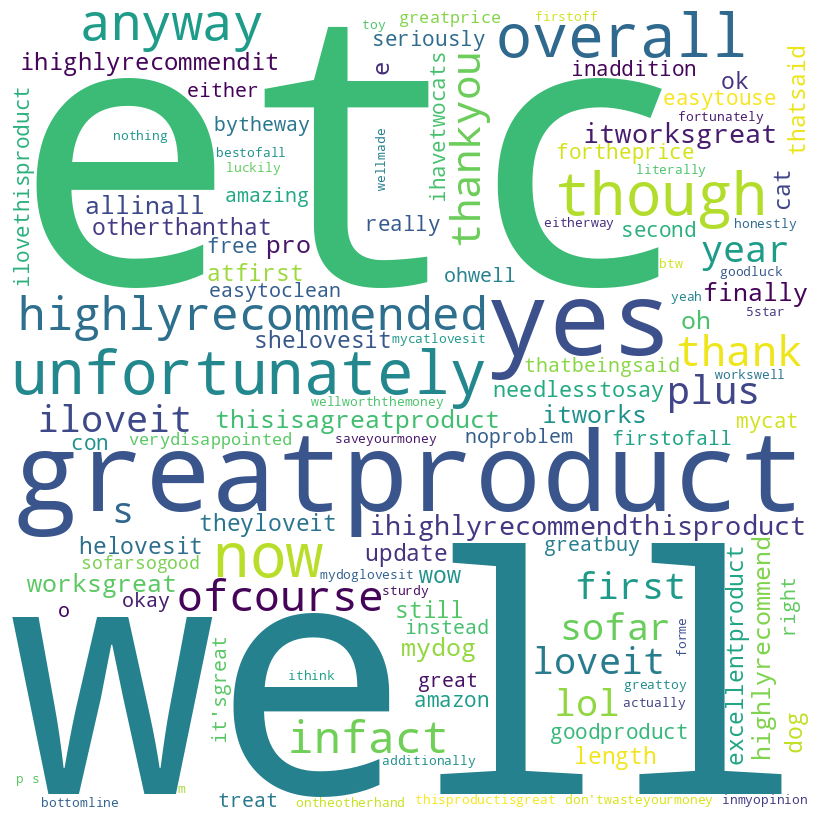

In [122]:
comment_word=''
comment_word+=''.join(all_words)+''

wordcloud=WordCloud(width=800, height=800,
                    background_color='white',
                    min_font_size=10).generate(comment_word)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [123]:
def remove_noise(comment, stop_words = ()):
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = []
    for token, tag in pos_tag(comment):
        token = re.sub(r'\W', ' ', token)
        token = re.sub(r'\s+[a-zA-Z]\s+', ' ', token)
        token = re.sub(r'\^[a-zA-Z]\s+', ' ', token)
        token = re.sub(r'\s+', ' ', token, flags=re.I)
        token = re.sub(r'^b\s+', '', token)
        token = re.sub(' +', ' ', token)
        if token == 'n t':
          token = 'not'
        if token == ' s':
          token = 'is'
        if token == 've':
          token = 'have'
        if token == 'ca':
          token = 'can'
        if token == 'wo':
          token = 'will'
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        token = lemmatizer.lemmatize(token, pos = pos)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [124]:
pos_tag(sent_t, tagset='universal')

[('Hello', 'NOUN'),
 (',', '.'),
 ('I', 'PRON'),
 ('am', 'VERB'),
 ('Mariana', 'NOUN'),
 ('.', '.'),
 ('I', 'PRON'),
 ('am', 'VERB'),
 ('happy', 'ADJ')]

In [125]:
for word,tag in pos_tag(sent_t):
  if tag.startswith('NN'):
    pos='n'
  elif tag.startswith('VB'):
    pos='v'
  else:
    pos='a'
  print(lemmatizer.lemmatize(word, pos=pos))

Hello
,
I
be
Mariana
.
I
be
happy


In [126]:
stop_words = set(stopwords.words('english'))
stop_words.update([''])
stop_words

{'',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own'

In [130]:
clean_comments=[]
for comment in comments:
  clean_comments.append(remove_noise(comment, stop_words))
  clean_comments[0]

In [131]:
all_words=list(get_all_words(comments))
all_words

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it',
 'this',
 'product',
 'is',
 'easy',
 'to',
 'set',
 'up',
 'and',
 'use',
 '.',
 'i',
 'have',
 'a',
 'new',
 'puppy',
 'border',
 'collie',
 'who',
 'will',
 'be',
 'fullgrown',
 'around',
 '50',
 '#',
 '.',
 'the',
 'crate',
 'would',
 'still',
 'have',
 'lots',
 'of',
 'room',
 'for',
 'her',
 '.',
 'i',
 'purchased',
 'this',
 'thru',
 'amazon',
 'which',
 'is',
 'very',
 'convienience',
 'because',
 'the',
 'delivery',
 'person',
 'carried',
 'it',
 'right',
 'to',
 'my',
 'door',
 '.',
 'total',
 'cost',
 'was',
 'cheaper',
 'than',
 'the',
 'local',
 'pet',
 'stores',
 '.',
 'yep',
 '!',
 '!',
 'i',
 'love',
 'amazon',
 '.',
 'my

In [132]:
WF=nltk.FreqDist(all_words)
WFdf=pd.DataFrame(WF.most_common(30))
WFdf.columns=['Word','Count']

fig=px.bar(WFdf, x='Count', y ='Word', orientation='h',text='Count', width=1000, height=750,
           template='plotly_white',title='Word Count-1')

fig.show()

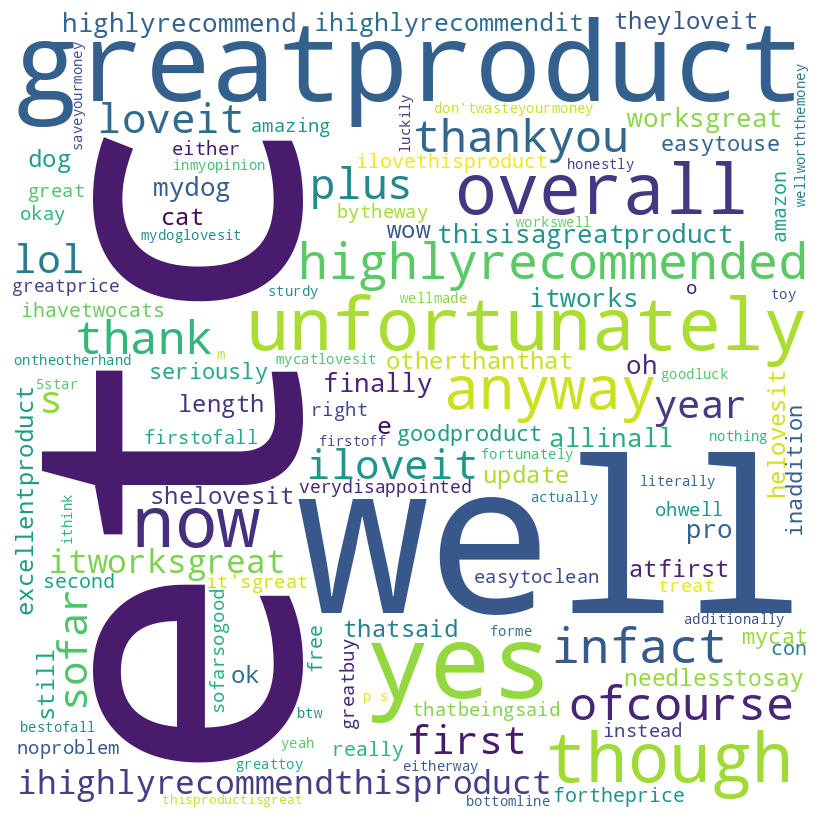

In [133]:
comment_word=''
comment_word+=''.join(all_words)+''

wordcloud=WordCloud(width=800, height=800,
                    background_color='white',
                    min_font_size=10).generate(comment_word)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [134]:
text=nltk.Text(all_words)
finder=nltk.collocations.BigramCollocationFinder.from_words(text)
df_2=pd.DataFrame.from_dict(finder.ngram_fd.most_common(30))
df_2.columns=['Words','Count']
df_2.head()

,Words,Count
0,"(., i)",68628
1,"(., the)",24566
2,"(., it)",23624
3,"(,, and)",23465
4,"(,, but)",22575


In [135]:
comments=[]
for l in df_2['Words']:
  comments.append("".join(l))
df_2['Words']=pd.Series(comments)
fig=px.bar(df_2, x='Count', y ='Words', orientation='h', text='Count', width=1000, height=750, template='plotly_white', title='Word Count-2')

fig.show()

In [136]:
finder= nltk.collocation.Tri

AttributeError: module 'nltk' has no attribute 'collocation'

In [137]:
from posixpath import join
finder=nltk.collocations.QuadgramCollocationFinder.from_words(text)
df_4=pd.DataFrame.from_dict(finder.ngram_fd.most_common(30))
df_4.columns=['Words','Frequency']
comments=[]
for l in df_4['Words']:
  comments.append(' ', join)

TypeError: list.append() takes exactly one argument (2 given)

In [ ]:
analyzer=SentimentIntensityAnalyzer()
score_list=list()

for commentin df.text:
  score=analyzer.polarity_scores(comment)
  score_list.append(score['compound'])

df['SS']=pd.Series(score_list)
df.head()

In [ ]:
df.loc[df.SS>=0.25, 'Sentiment']='Positive'
df.loc[(df.SS<0.25)&(df.SS>-0.25), 'Sentiment']='Neutral'
df.loc[df.SS<=0.25, 'Sentiment']='Negative'
df.head()

In [ ]:
df_sentiment=df.Sentiment.value_counts().reset_index()
df_sentiment.columns=['Sentiment','Count']
fig=px.pie(df_sentiment, calues='Count', name='Sentiment', title='Sentiment Count')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

In [139]:
df.groupby(['label', 'Sentiment']).agg({'Sentiment':['count'],'SS':['mean','min','max']})

KeyError: 'Sentiment'

In [141]:
df_sen=(df.groupby(['label']).Sentiment.value_counts(normalize=True)*100).reset_index()
df_sen=['Pet','Sentiment','Percentage']

fig=px.bar(df_sen, x='Pet', y='Percentage',color='Sentiment',title='Sentiment by Pet',
           text=df_sen['Percentage'],applu(lambda x:'{0:1.2f}%', format(x)),
           color_discrete_map={'Positive':'green','Neutral':'blue','Negative':'red'}, template='plotly_white')
fig.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-141-fc1d4042810f>, line 6)